<a href="https://colab.research.google.com/github/astrovishalthakur/100-days-of-machine-learning/blob/main/Ensemble/Bagging/BaggingIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd


In [70]:
from sklearn.datasets import load_iris
iris = load_iris()

In [71]:
iris.data.shape

(150, 4)

In [72]:
iris.target.shape

(150,)

In [73]:
df = pd.DataFrame(data = (np.concatenate((iris.data, iris.target.reshape(150, 1)), axis=1)), columns=iris.feature_names + ["Species"]).astype({"Species": int})

In [74]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
a = df.columns
a

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [76]:
df = df[df.Species != 0][[a[1], a[2], a[-1]]]

In [77]:
df.tail()

,sepal width (cm),petal length (cm),Species
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2
149,3.0,5.1,2


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [79]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

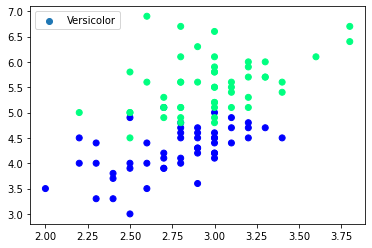

In [80]:
plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=df.iloc[:, -1], cmap="winter")
plt.legend(df.Species.apply(lambda x: {1:"Versicolor", 2:"Virginica"}[x]))

In [97]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [98]:
df_train

,sepal width (cm),petal length (cm),Species
91,3.0,4.6,1
71,2.8,4.0,1
109,3.6,6.1,2
101,2.7,5.1,2
149,3.0,5.1,2
126,2.8,4.8,2
129,3.0,5.8,2
121,2.8,4.9,2
146,2.5,5.0,2
59,2.7,3.9,1


In [99]:
df_val

,sepal width (cm),petal length (cm),Species
120,3.2,5.7,2
93,2.3,3.3,1
138,3.0,4.8,2
106,2.5,4.5,2
131,3.8,6.4,2


In [100]:
df_test


,sepal width (cm),petal length (cm),Species
122,2.8,6.7,2
92,2.6,4.0,1
78,2.9,4.5,1
89,2.5,4.0,1
88,3.0,4.1,1


# Case 1- Bagging

In [101]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
126,2.8,4.8,2
59,2.7,3.9,1
59,2.7,3.9,1
71,2.8,4.0,1
109,3.6,6.1,2
109,3.6,6.1,2
101,2.7,5.1,2
91,3.0,4.6,1


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [106]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [107]:
def evaluate(clf, X, y):
  clf.fit(X, y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values, y.values, clf=clf, legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test, y_pred))

In [108]:
dt_bag1 = DecisionTreeClassifier()

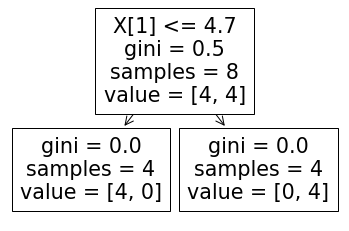

0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


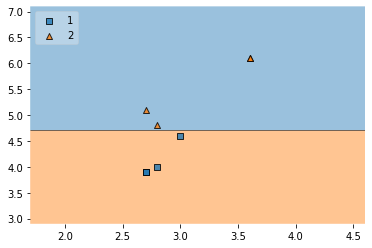

In [109]:
evaluate(dt_bag1, X, y)

In [110]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
146,2.5,5.0,2
126,2.8,4.8,2
71,2.8,4.0,1
126,2.8,4.8,2
126,2.8,4.8,2
109,3.6,6.1,2
91,3.0,4.6,1
149,3.0,5.1,2


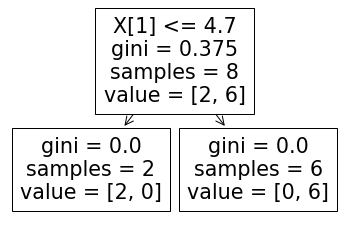

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8


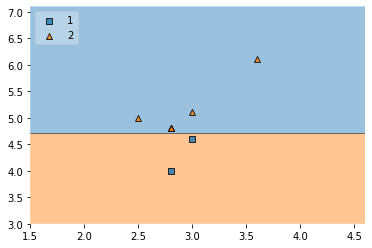

In [111]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [112]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
109,3.6,6.1,2
59,2.7,3.9,1
146,2.5,5.0,2
91,3.0,4.6,1
146,2.5,5.0,2
71,2.8,4.0,1
146,2.5,5.0,2
71,2.8,4.0,1


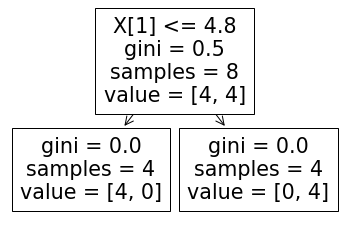

0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


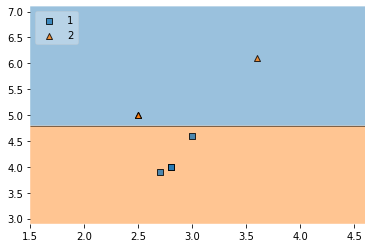

In [113]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [114]:
df_test

,sepal width (cm),petal length (cm),Species
122,2.8,6.7,2
92,2.6,4.0,1
78,2.9,4.5,1
89,2.5,4.0,1
88,3.0,4.1,1


In [120]:
print("Predictor 1",dt_bag1.predict(np.array([2.8,6.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8,6.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8,6.7]).reshape(1,2)))


Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Type of Bagging

### 1. Pasting

In [121]:
# same as bagging but without row replacement
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),Species
91,3.0,4.6,1
71,2.8,4.0,1
109,3.6,6.1,2
101,2.7,5.1,2
149,3.0,5.1,2
126,2.8,4.8,2
129,3.0,5.8,2
121,2.8,4.9,2
146,2.5,5.0,2
59,2.7,3.9,1


In [122]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Species
146,2.5,5.0,2
109,3.6,6.1,2
71,2.8,4.0,1
149,3.0,5.1,2
129,3.0,5.8,2
101,2.7,5.1,2
126,2.8,4.8,2
91,3.0,4.6,1


### 2. Random Subspaces

##### It is all about column sampling 

In [123]:
df1 = pd.DataFrame(data = (np.concatenate((iris.data, iris.target.reshape(150, 1)), axis=1)), columns=iris.feature_names + ["Species"]).astype({"Species": int})

In [125]:
df1 = df1.sample(10)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
24,4.8,3.4,1.9,0.2,0
80,5.5,2.4,3.8,1.1,1
132,6.4,2.8,5.6,2.2,2
51,6.4,3.2,4.5,1.5,1
112,6.8,3.0,5.5,2.1,2
84,5.4,3.0,4.5,1.5,1
127,6.1,3.0,4.9,1.8,2
139,6.9,3.1,5.4,2.1,2
17,5.1,3.5,1.4,0.3,0
53,5.5,2.3,4.0,1.3,1


In [129]:
df1.sample(2, replace=True, axis=1) # we are taking samples out of columns

,sepal length (cm),petal length (cm)
24,4.8,1.9
80,5.5,3.8
132,6.4,5.6
51,6.4,4.5
112,6.8,5.5
84,5.4,4.5
127,6.1,4.9
139,6.9,5.4
17,5.1,1.4
53,5.5,4.0


### 3. Random Patches

##### We do both row and column sampling

In [130]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
24,4.8,3.4,1.9,0.2,0
80,5.5,2.4,3.8,1.1,1
132,6.4,2.8,5.6,2.2,2
51,6.4,3.2,4.5,1.5,1
112,6.8,3.0,5.5,2.1,2
84,5.4,3.0,4.5,1.5,1
127,6.1,3.0,4.9,1.8,2
139,6.9,3.1,5.4,2.1,2
17,5.1,3.5,1.4,0.3,0
53,5.5,2.3,4.0,1.3,1


In [132]:
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,petal width (cm),Species
17,0.3,0
53,1.3,1
132,2.2,2
51,1.5,1
132,2.2,2
53,1.3,1
139,2.1,2
80,1.1,1
